In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import itertools

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.utils import to_categorical
from keras import optimizers

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import random as rn

import os

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(0)
# The above is necessary for Numpy to generate fixed random numbers in a clear initial state.

rn.seed(0)
# The above is necessary for Python to generate a fixed random number in a clear initial state.

tf.random.set_seed(0)
#The above is necessary for Tensor to generate a fixed random number in a clear initial state.

In [ ]:
sns.set(style='white', context='notebook', palette='deep')

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


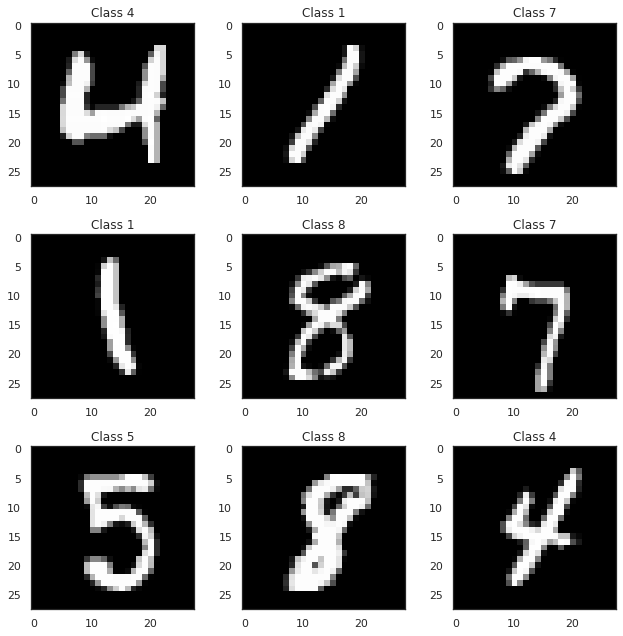

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
df = pd.DataFrame(y_train, columns = ['target'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


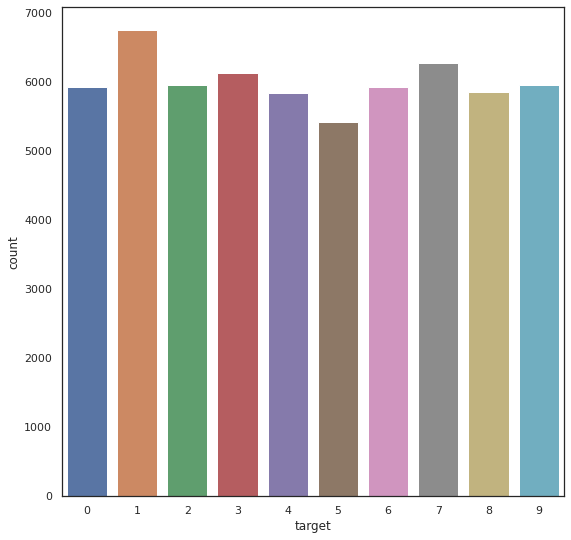

In [ ]:
sns.countplot(df['target'])

In [ ]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0  202   94  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0  139  253  125  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0   45  251  255   45  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0   26    0    0    0    0    4  228  254  254   36  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0   38  238   61    0    0    0   84  254  254  133    8  0  0  0  0 

In [ ]:
print(num)

41993


In [ ]:
y_train[41993]

4

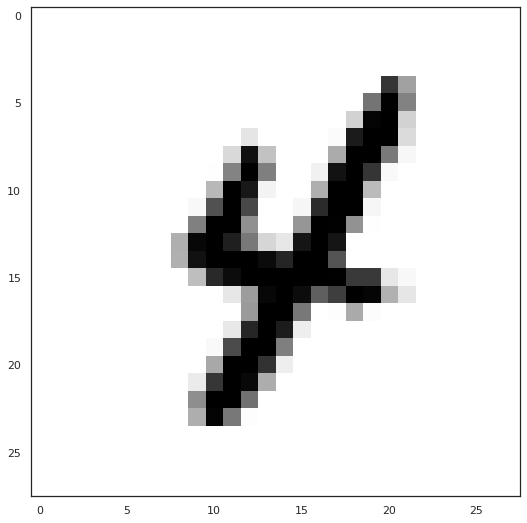

In [ ]:
_, ax = plt.subplots()
ax.imshow(X_train[41993].reshape(28, 28), cmap='gray_r')

In [ ]:
#(.reshape(batch_size,d1,d1,channel))
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# Normalize between 0 and 1 the data (The pixel-value is an integer between 0 and 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Split the dataset into train and validation set
# Keep 10% for the validation and 90% for the training

feature_train, feature_val, label_train, label_val = train_test_split(X_train, y_train, test_size = 0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size = (5,5), strides = 1, padding = 'Same', 
                 activation ='relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 8, kernel_size = (4,4), strides = 2, padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 12, kernel_size = (4,4), strides = 2, padding = 'Same', 
                 activation ='relu'))
model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer and compile the model
optimizer = optimizers.SGD(learning_rate=0.03, clipnorm=5.)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 4)         104       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         520       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 12)          1548      
_________________________________________________________________
flatten (Flatten)            (None, 588)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               117800    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 121,982
Trainable params: 121,982
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(feature_train, label_train, batch_size = 100,  epochs = 16, validation_data = (feature_val, label_val), verbose = 1)

Epoch 1/16
540/540 [==============================] - 48s 59ms/step - loss: 1.6321 - accuracy: 0.4388 - val_loss: 0.2003 - val_accuracy: 0.9400
Epoch 2/16
540/540 [==============================] - 31s 58ms/step - loss: 0.1802 - accuracy: 0.9467 - val_loss: 0.1240 - val_accuracy: 0.9628
Epoch 3/16
540/540 [==============================] - 31s 58ms/step - loss: 0.1204 - accuracy: 0.9631 - val_loss: 0.0980 - val_accuracy: 0.9725
Epoch 4/16
540/540 [==============================] - 31s 58ms/step - loss: 0.0946 - accuracy: 0.9708 - val_loss: 0.0868 - val_accuracy: 0.9735
Epoch 5/16
540/540 [==============================] - 31s 58ms/step - loss: 0.0761 - accuracy: 0.9762 - val_loss: 0.0794 - val_accuracy: 0.9757
Epoch 6/16
540/540 [==============================] - 32s 59ms/step - loss: 0.0651 - accuracy: 0.9796 - val_loss: 0.0802 - val_accuracy: 0.9757
Epoch 7/16
540/540 [==============================] - 32s 59ms/step - loss: 0.0554 - accuracy: 0.9822 - val_loss: 0.0786 - val_accuracy:

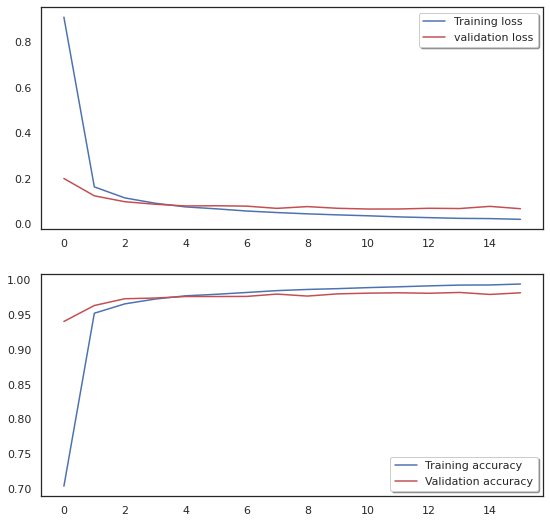

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return

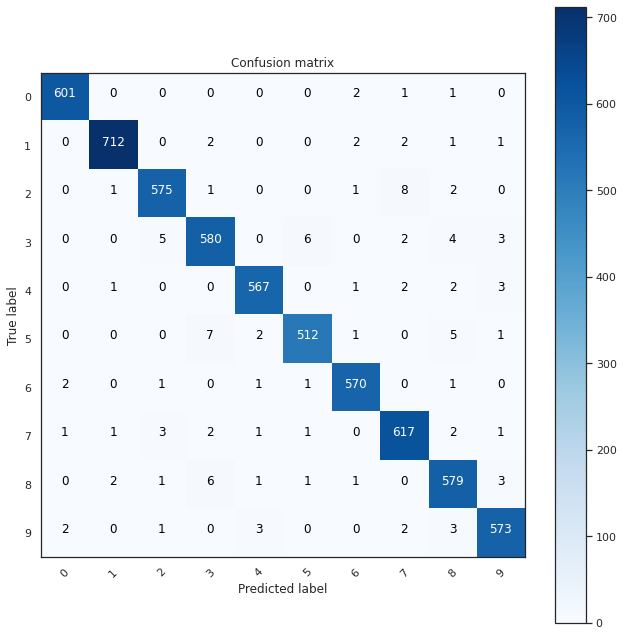

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(feature_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(label_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = feature_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap='gray_r')
            ax[row,col].set_title("Pred: {}; True: {}".format(pred_errors[error],obs_errors[error]))
            n += 1

    return

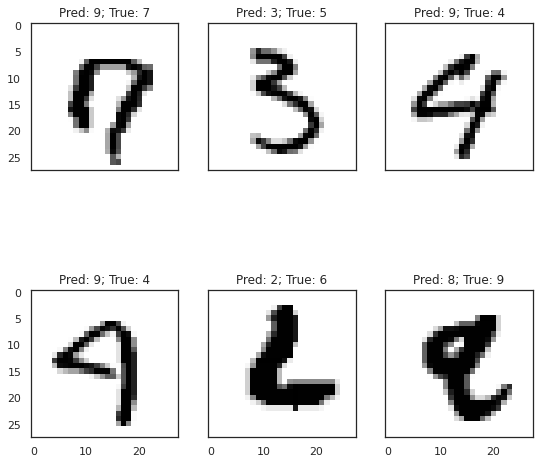

In [ ]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)